###### 1.00/1.001 Engineering Computation and Data Science
# Problem Set 2
#### Due before March 3rd 2021 11:59 PM

In [1]:
# Useful Relevant Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Boilerplate Answer Declaration
your_answer_here = '{{replace this variable with the your own statement for the correct code. }}'

# If you feel you need to import additional libraries,
# you can do so in the relevant question

## 2.1) What day of the week was 1/1/1970

In [2]:
myArray = np.array([1,2,3,4,5,6,7])
mySeries = pd.Series(myArray)
mySeries.index = pd.date_range(start='1/1/1970', periods=7)
mySeries.index.dayofweek

# Your Code Goes Here
print ("January 1st 1970 was a", mySeries.index.day_name()[0])

January 1st 1970 was a Thursday


## 2.2) UFO Data Analysis

In [3]:
# let's import the ufo data from the online collection
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

# and get a preview of the data we're working with
ufo

City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
18236            Grant Park             NaN       TRIANGLE    IL   
18237           Spirit Lake             NaN           DISK    IA   
18238           Eagle River             NaN            NaN    WI   
18239           Eagle River             RED          LIGHT    WI   
18240                  Ybor             NaN           OVAL    FL   

                     Time  
0     1930-06-01 22:00:00  
1     1930-06-30 20:00:00  
2     1931-02-15 14:00:00  
3     1931-06-01 13:00:00  
4     1933-04-18 19:00:00  
...                   ...  
18236 2000-12-31 23:00:00  
18237 2000-12-31 23:00:00  
18238 2000-12-31 23:45:00  
18239 2000-12-31 23:45:00  
18240 2000-12-31 23:59:00  

[18241 rows x 5 columns]

### 2.2.1) What day of the week has the most sightings?

In [4]:
# Your Code Goes Here
import datetime
Weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#create new column with day of the week for given date
ufo['Week day'] = ""
for i in range(len(ufo)):
    ufo.loc[i, 'Week day'] = ufo.Time[i].strftime("%A")

#initialize all week day occurrences to 0 in dictionary
weekday_dict = {}
for i in Weekdays:
    weekday_dict[i] = 0

#loop through data frame and count week day occurrences 
for i in range(len(ufo)):
    if ufo.loc[i, 'Week day'] in weekday_dict.keys():
        weekday_dict[ufo.loc[i, 'Week day']] += 1

#extract day with most sightings
DayMostSightings = max(weekday_dict, key = weekday_dict.get)
print("The most popular day of the week to report a UFO was", DayMostSightings)

The most popular day of the week to report a UFO was Tuesday


### 2.2.2) On the day of the week with most sightings plot a histogram the time of day the sightings occured
Give the slight confusion on the earlier version of this question; we will accept a plot for the day of the week (*e.g. Saturday, Sunday, etc.*) with the most UFO sightings OR the calendar date (*e.g. January 19 2001, November 3 1989*) with the most UFO sightings.

Text(0.5, 1.0, 'Histogram of sightings on Tuesday (day with most sightings)')

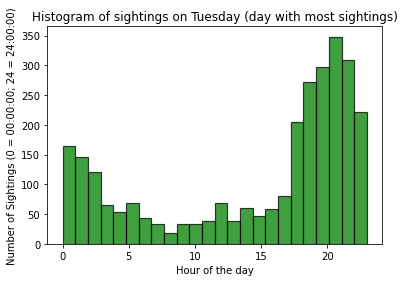

In [5]:
# Your Code Goes Here
import datetime
# import matplotlib.dates as mdates

#For Tuesday (day of week with most sightings), create new dataframe with just the time of sighting
ufo['Time of Day'] = [datetime.datetime.time(i) for i in ufo['Time']]
ufo2 = ufo[(ufo['Week day'] == "Tuesday")]
ufo3 = ufo2.iloc[:, 5:7]

#Plot histogram the time of day sightings occurred
plt.hist([t.hour for t in ufo3['Time of Day']], bins = 24,  facecolor='green', alpha=0.75,edgecolor='black', linewidth=1.2) # to bin by hour
plt.xlabel('Hour of the day')
plt.ylabel('Number of Sightings (0 = 00:00:00; 24 = 24:00:00)')
plt.title('Histogram of sightings on Tuesday (day with most sightings)')


### 2.2.3) Do the same for the day with the 2nd most sightings

The second most popular day of the week to report a UFO was Sunday


Text(0.5, 1.0, 'Histogram of sightings on Sunday (day with second most sightings)')

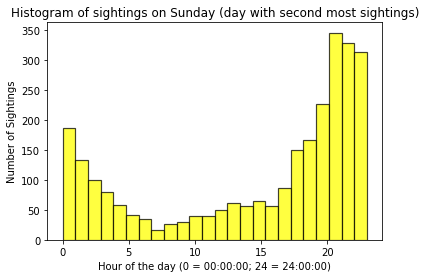

In [6]:
# Your Code Goes Here

#extract day of week with 2nd most sightings
max2 = 0
for day in weekday_dict:
    if weekday_dict[day] < weekday_dict[DayMostSightings] and weekday_dict[day] > max2:
        max2 = weekday_dict[day]
    SecondDayMostSightings = day
print("The second most popular day of the week to report a UFO was", SecondDayMostSightings)

#For Sunday (day of week with second most sightings), create new dataframe with just the time of sighting
ufo4 = ufo[(ufo['Week day'] == "Sunday")]
ufo5 = ufo4.iloc[:, 5:7]

#Plot histogram the time of day sightings occurred
plt.hist([t.hour for t in ufo5['Time of Day']], bins = 24,  facecolor='yellow', alpha=0.75,edgecolor='black', linewidth=1.2) # to bin by hour
plt.xlabel('Hour of the day (0 = 00:00:00; 24 = 24:00:00)')
plt.ylabel('Number of Sightings')
plt.title('Histogram of sightings on Sunday (day with second most sightings)')

### 2.2.4) For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.
One possible idea here, is to answer the opposite question you answered in 2.2.2. (*e.g. if you answered day of week then do calendar date here*); however, we will accept any observations you make here provided you substantiate them with data analysis.

# Pattern 1: Recent spike in UFO sightings

Reports of UFO sightings have more than quintupled over the past 5 years i.e. 1995-2000 (compared to the previous 65 years i.e 1930- 1995).

Text(0.5, 1.0, 'Histogram of sightings by year')

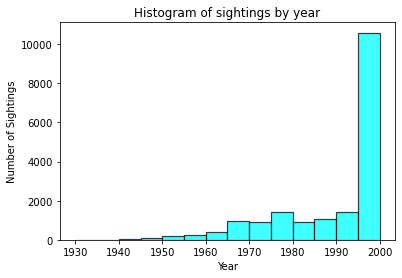

In [7]:
#Extract sightings by year
SightingsByYear = ufo['Time'].dt.year

plt.hist(SightingsByYear, bins = 14, facecolor='cyan', alpha=0.75,edgecolor='black', linewidth=1.2)
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('Histogram of sightings by year')

# Pattern 2: UFO sightings often occur at night

For each day of the week, we observe a general trend that UFO sightings peak at nightime.

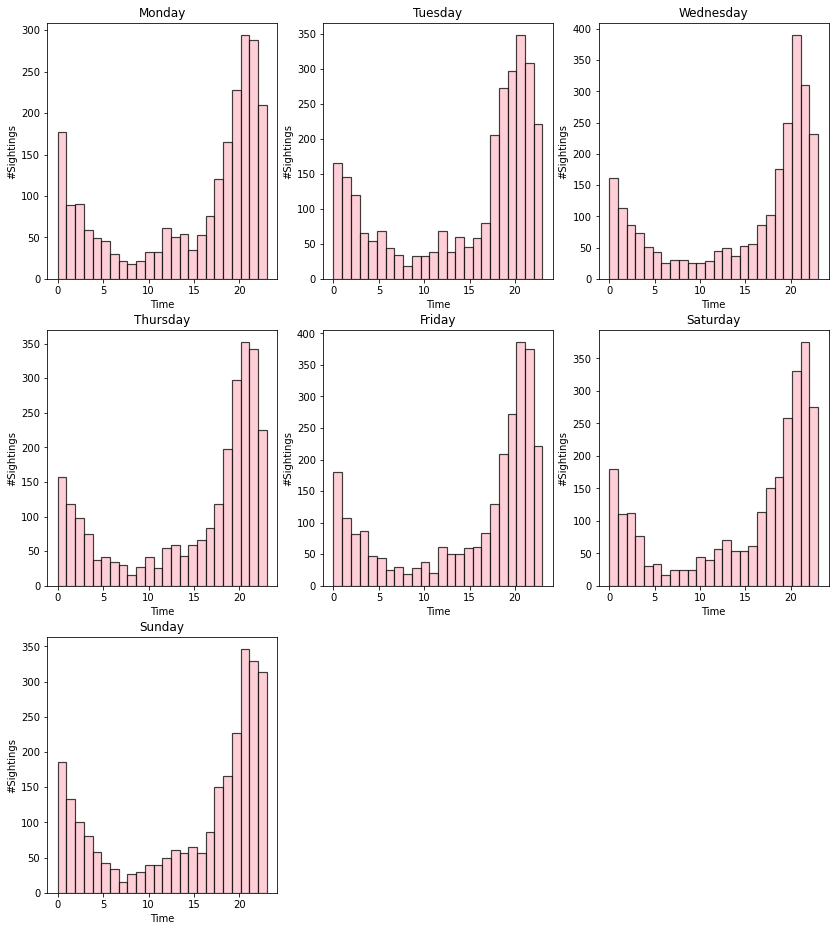

In [8]:
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,16))

for i in Weekdays:
#     fig, axs = plt.subplots(3,3)
    day = ufo[ufo['Week day'] == i]
    plt.subplot(a,b,c).hist([t.hour for t in day['Time of Day']], bins = 24,  facecolor='pink', alpha=0.75,edgecolor='black', linewidth=1.2)
    plt.title(i)
    c += 1
    
    plt.xlabel('Time')
    plt.ylabel('#Sightings')